# Seaborn Basics


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The goal of this exercise is to analyze a restaurant invoices and tips

In [2]:
df = sns.load_dataset('tips')

display(df.head())
df.info()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## Counting number of datapoints
---

**On which day of the week are there more reservations at the restaurant?**
- Show this with a Seaborn "Countplot"
- Arrange days in week order

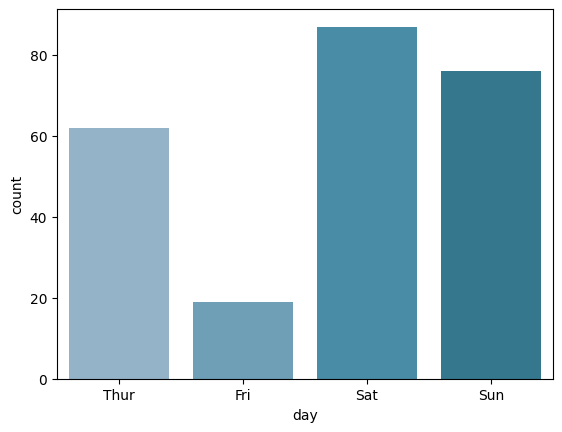

In [3]:
with sns.color_palette("PuBuGn_d"):
    sns.countplot(data = df, x='day', order=['Thur', 'Fri', 'Sat', 'Sun']);

Add a second breakdown with (`sex`, `smoker` or `time`) on top of the `day` dimension in a visually meaningful manner

<AxesSubplot:xlabel='day', ylabel='count'>

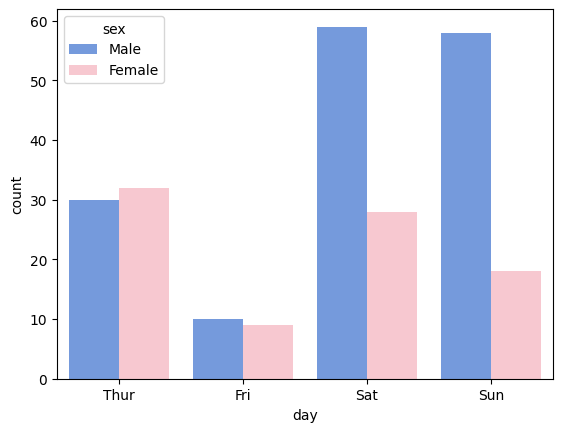

In [4]:
sns.countplot(data = df, 
                x='day', 
                hue="sex", 
                order=['Thur', 'Fri', 'Sat', 'Sun'], 
                palette=["cornflowerblue", "pink"]
             )



<AxesSubplot:xlabel='day', ylabel='count'>

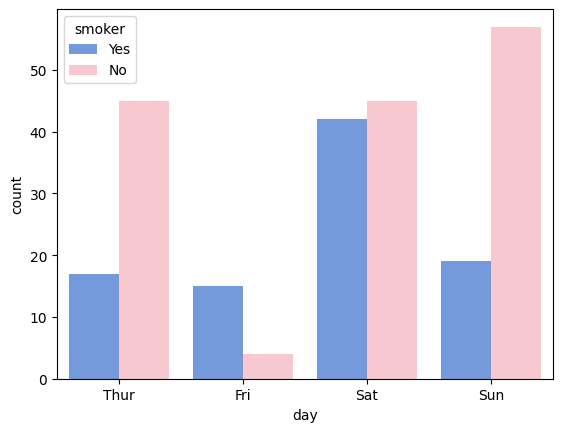

In [5]:
sns.countplot(data = df, 
                x='day', 
                hue="smoker", 
                order=['Thur', 'Fri', 'Sat', 'Sun'], 
                palette=["cornflowerblue", "pink"]
             )



<AxesSubplot:xlabel='day', ylabel='count'>

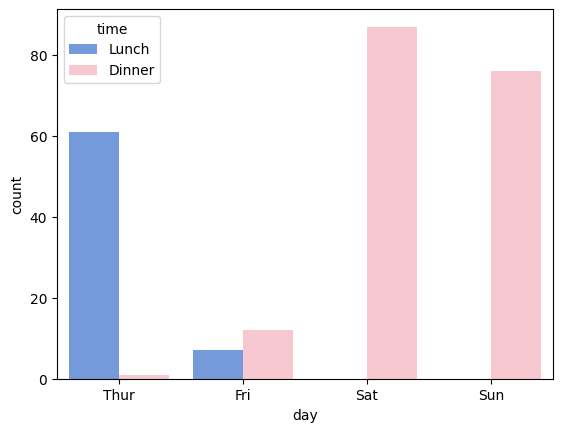

In [6]:
sns.countplot(data = df, 
                x='day', 
                hue="time", 
                order=['Thur', 'Fri', 'Sat', 'Sun'], 
                palette=["cornflowerblue", "pink"]
             )



## Plotting distributions of numeric values

Let's now analyse the `tips` values.

### Simple distribution

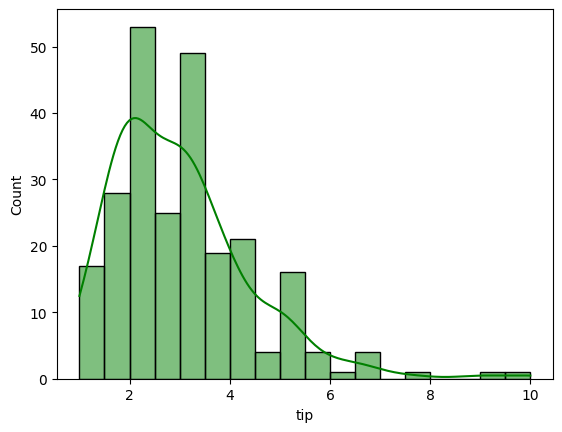

In [7]:
sns.histplot(df.tip, kde=True, color="green");

### Multiples distribution, same ax


bar


box


violin


boxen


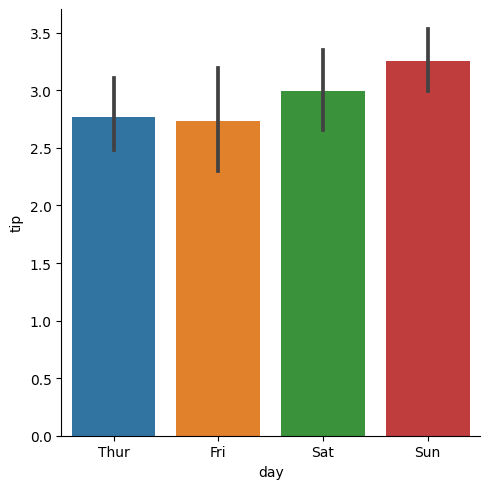

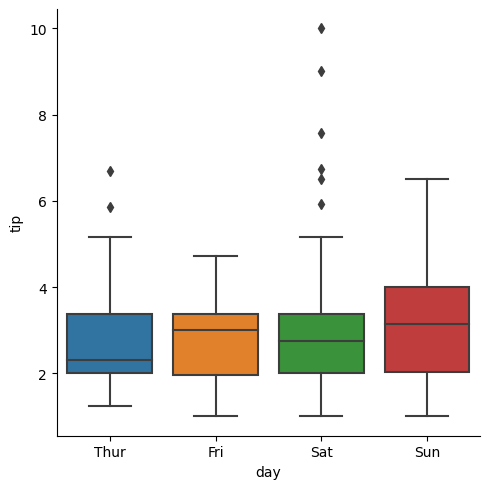

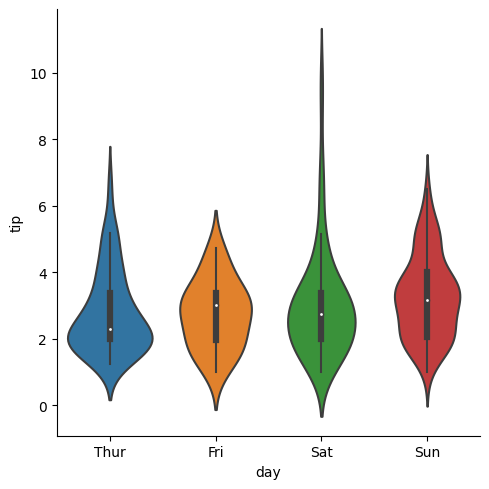

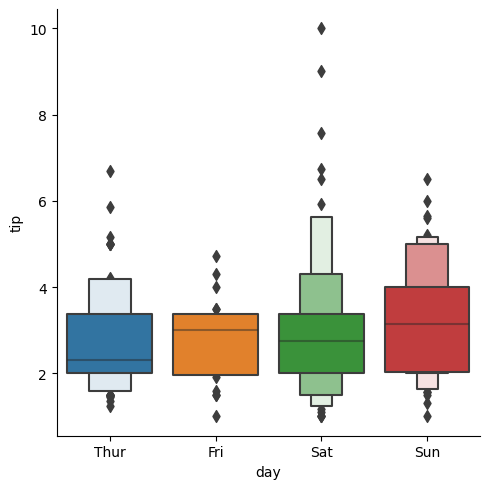

In [8]:
catplots = ("bar", "box", "violin", "boxen")

for catplot in catplots:
    print(catplot)
    display(sns.catplot(data=df, x='day', y='tip', kind=f'{catplot}'));


### FacetGrid of distributions

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


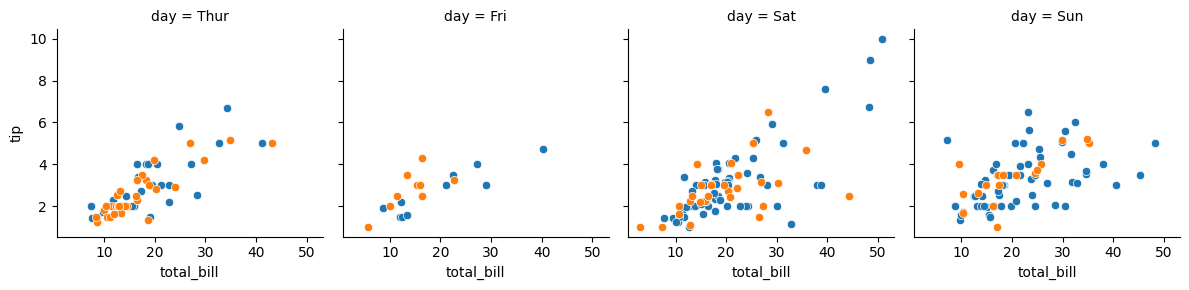

In [9]:
print(df.keys())
g = sns.FacetGrid(df, col="day", hue="sex")
g.map(sns.scatterplot, 'total_bill', 'tip');

Let's add a `row="smoker"` and `hue="smoker"` parameter. 

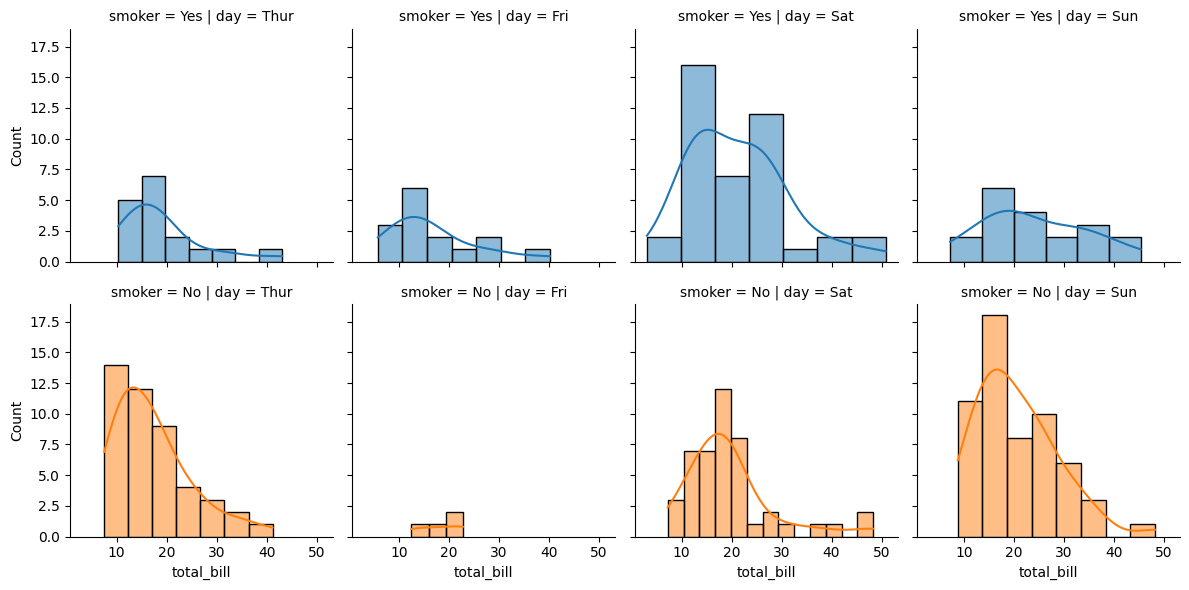

In [10]:
g = sns.FacetGrid(df, col="day", row="smoker", hue='smoker')
g.map(sns.histplot, "total_bill", kde=True);

## Correlations

Let's start looking for correlation between  `tip` and `total_bill`


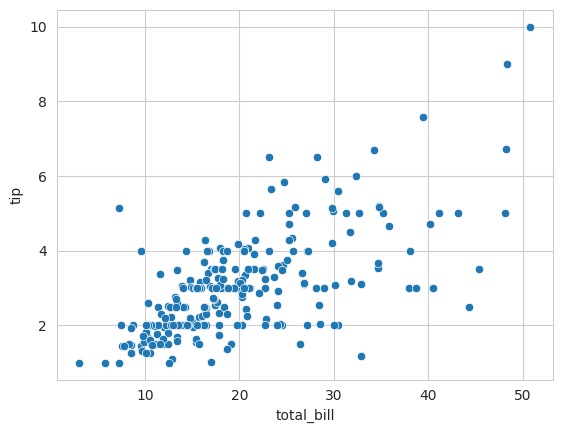

In [11]:
with sns.axes_style(style="whitegrid"):
    sns.scatterplot(x="total_bill", y="tip", data=df)

❓ Another beautiful way of looking at this data is to use the [`seaborn.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

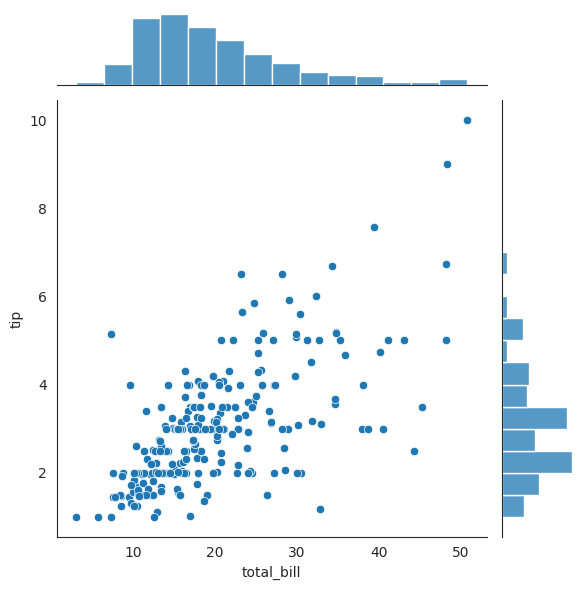

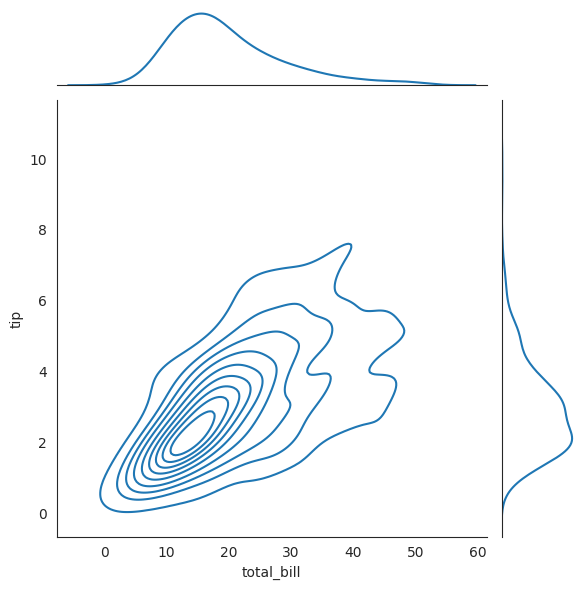

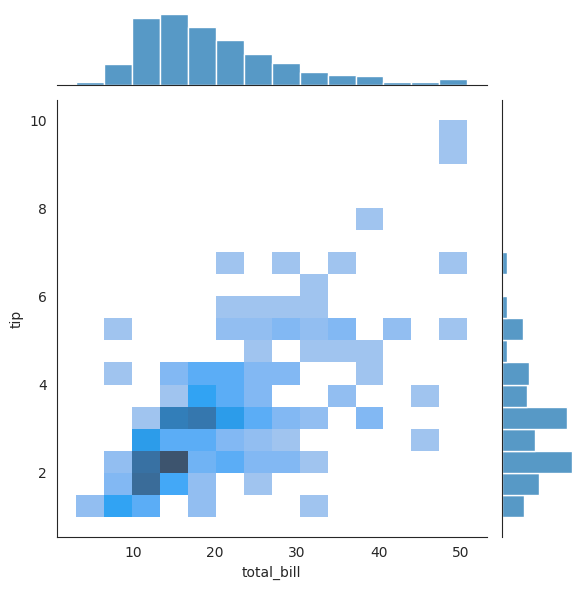

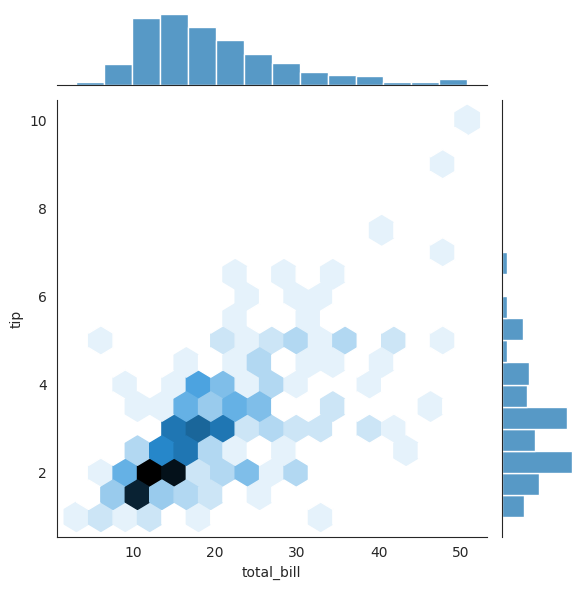

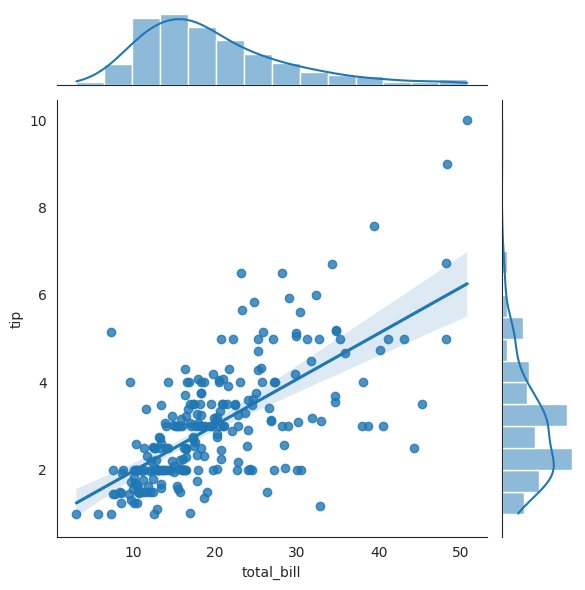

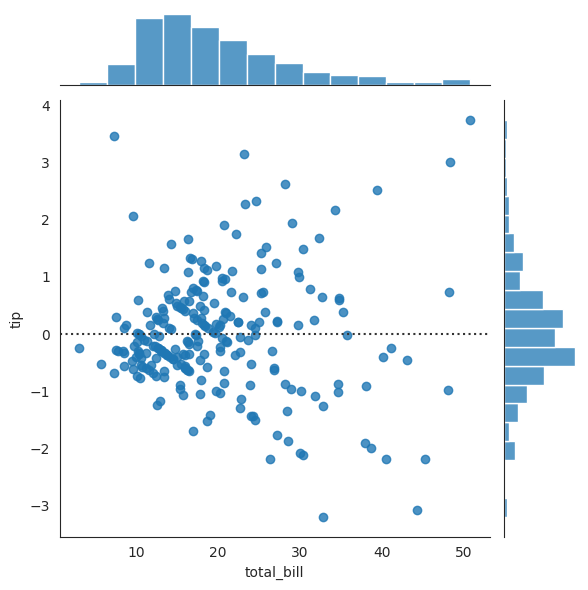

In [12]:
kinds = ["scatter", "kde", "hist", "hex", "reg", "resid"]

with sns.axes_style("white"):
    for kind in kinds:
        display(sns.jointplot(x="total_bill", y="tip", kind=f"{kind}", data=df));

Let's now compute a simple linear regression curve using `sns.regplot()`

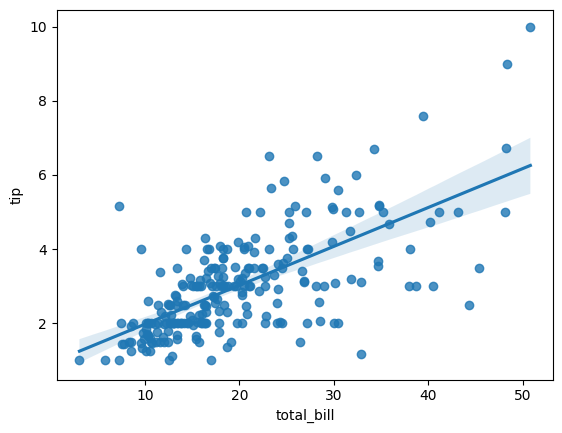

In [13]:
sns.regplot(x="total_bill", y="tip", data=df);

Now, try also to use a `FacetGrid` to plot two regplots (one for smokers only, one for non-smokers). 

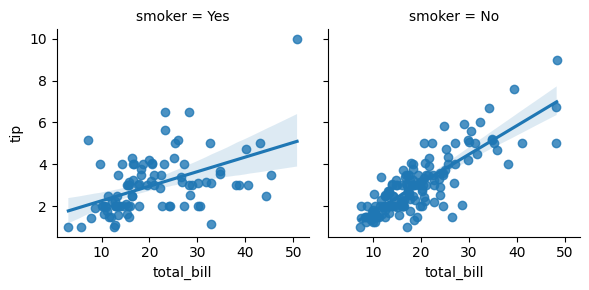

In [14]:
g = sns.FacetGrid(data=df, col="smoker")
g.map(sns.regplot, "total_bill", "tip")

## DataFrame-wide analysis with pairplot

A very useful tool to identify **all correlations between all pairs of dataframe's columns** is the [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html):

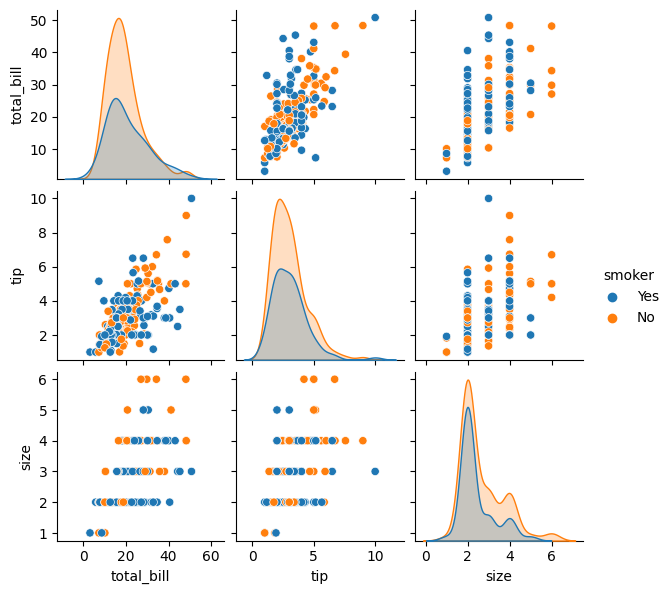

In [15]:
sns.pairplot(df, height=2, hue="smoker");